原始数据：
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


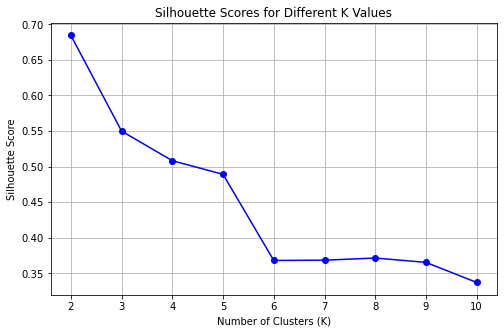

最佳的K值为：2

聚类结果：
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


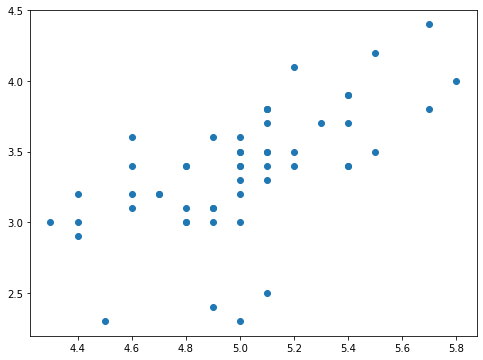

In [9]:
##导入调用所需的库
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris##加载鸢尾花数据集
data = load_iris()
iris_data = pd.DataFrame(data.data, columns=data.feature_names)
# 忽略全局警告
import warnings
warnings.filterwarnings("ignore")
# 设置显示负号
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
##显示完整数据
print("原始数据：")
print(iris_data.head())
##轮廓系数法确定最佳K值
silhouette_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(iris_data.iloc[:, :-1])  
    silhouette_avg = silhouette_score(iris_data.iloc[:, :-1], cluster_labels)
    silhouette_scores.append(silhouette_avg)
##绘制轮廓系数随K值变化的折线图
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Scores for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()
##输出最佳K值
best_k = k_values[np.argmax(silhouette_scores)]
print(f"最佳的K值为：{best_k}")
##基于最佳K值进行K-均值聚类
kmeans = KMeans(n_clusters=best_k, random_state=42)
iris_data['Cluster'] = kmeans.fit_predict(iris_data.iloc[:, :-1])
##显示聚类结果
print("\n聚类结果：")
print(iris_data.head())##可视化聚类结果（以第1和第2个特征为例）
plt.figure(figsize=(8, 6))
for cluster in range(best_k):
    cluster_data = iris_data[iris_data['Cluster'] == cluster]
plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster}')

